# S07 T01: Tasca del test d'hipòtesis
## Descripció

Aprèn a realitzar test d'hipòtesis amb Python.
## Nivell 1
### - Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [3]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

/home/marcr/Documents/itacademy/Hypothesis-testing/.venv/lib64/python3.10/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


Ho: Cilindrada mes gran, mes co2.
Ha: Cilindrada mes gran, menys co2.

In [4]:
df=pd.read_csv('diabetes.csv')
df = df.dropna(how='all')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


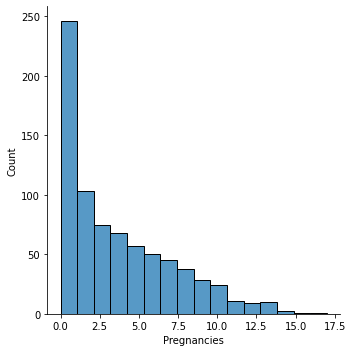

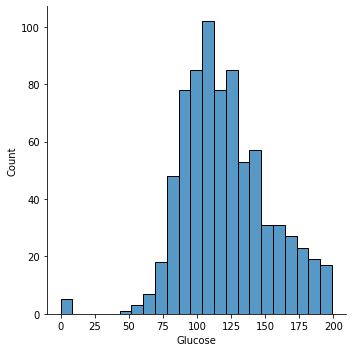

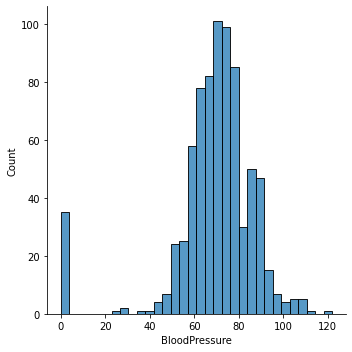

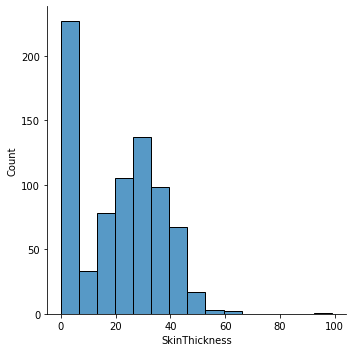

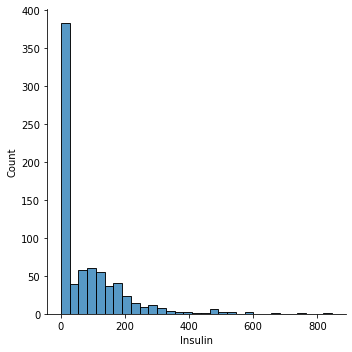

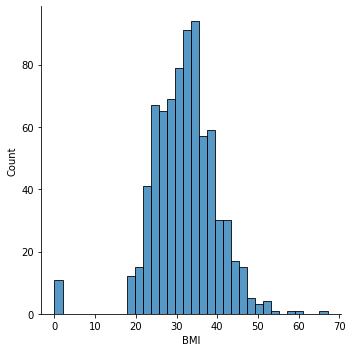

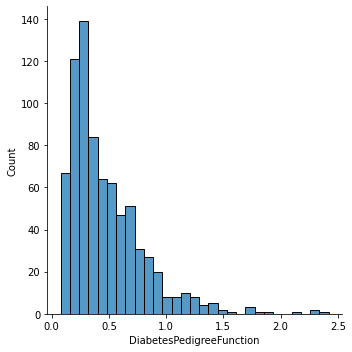

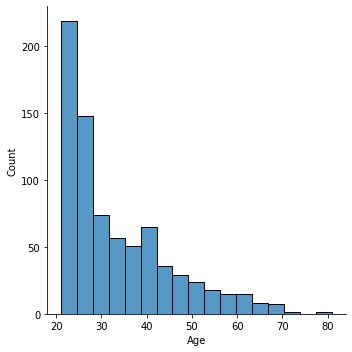

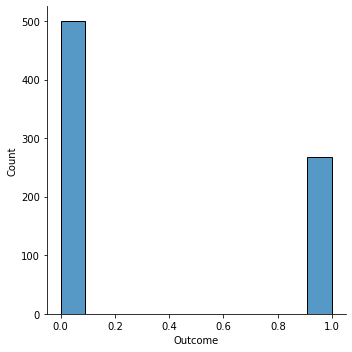

In [6]:

for column in df.columns.values:   
    sns.displot(df[df[column].notna()][column])


Miramos la normalidad de la distribucion primero con un test grafico Q-Q

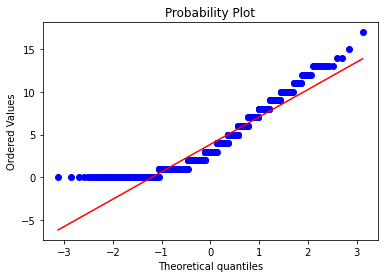

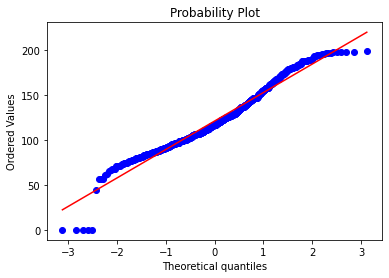

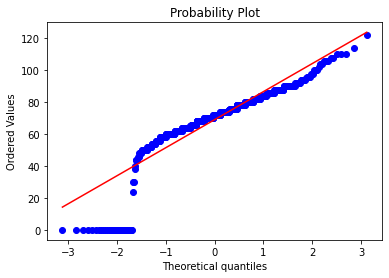

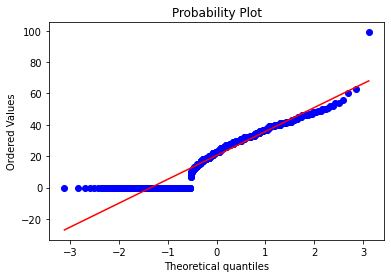

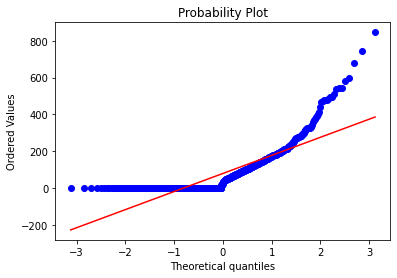

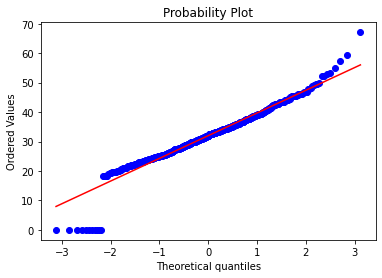

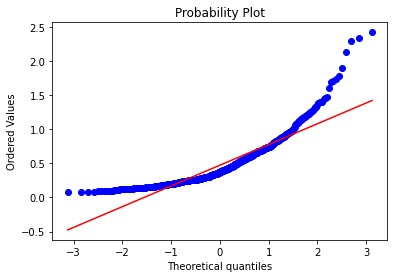

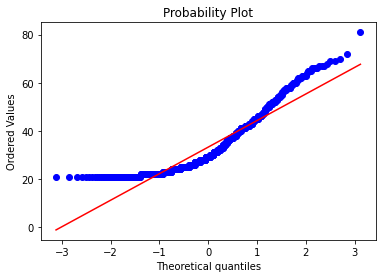

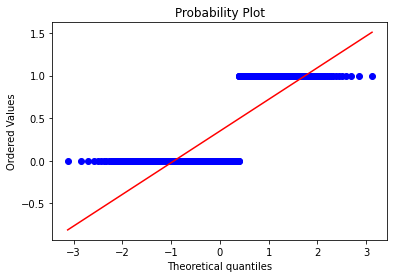

In [7]:
import numpy as np
import pylab
import scipy.stats as stats


for column in df.columns.values:   
    stats.probplot(df[column],dist="norm",plot=pylab)
    pylab.show()

Parece que la distribuciones se aleja de la normalidad sobretodo en los extremos, como la graficas de barras ya dejaba intuir

Verificamos con un boxplot

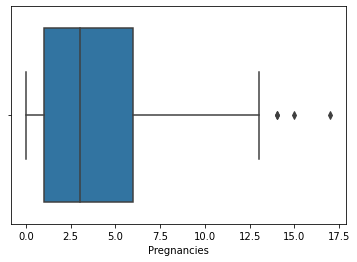

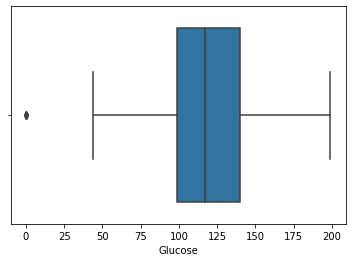

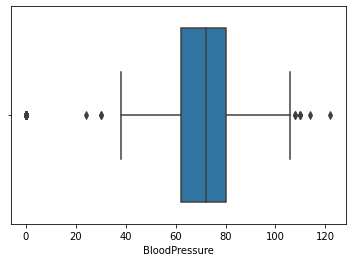

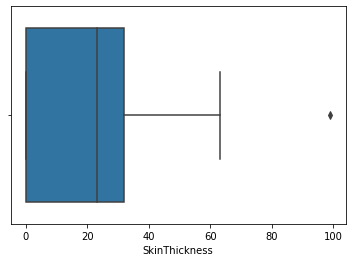

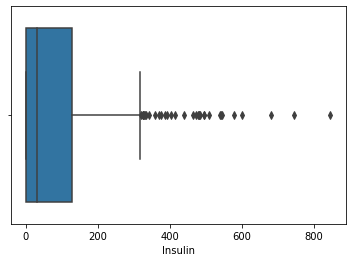

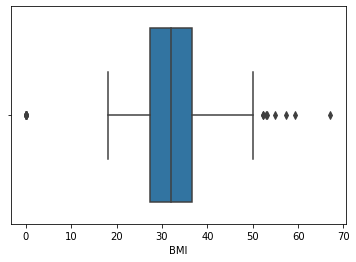

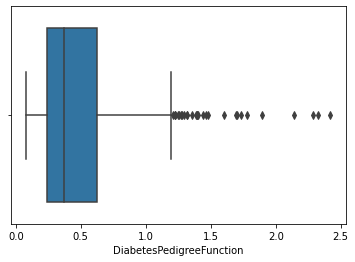

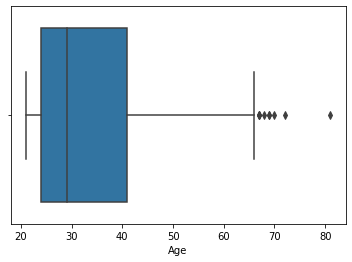

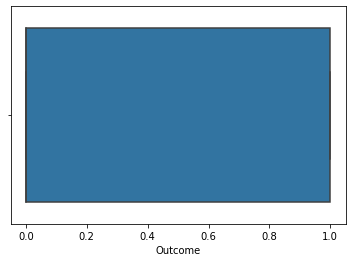

In [8]:
for column in df.columns.values:   
    sns.boxplot(x=df[column])
    pylab.show()

La media no se encuentra centrada asi que habra que normalizar

Pero intentamos ver numericamente con el test de Shapiro el grado de normalida vamos ha hacer la hipotesis de que siuge la distrubucion normal o gausiana

Ho --> la columna sigue una distribucion normal
Ha --> la columna no siguie una distribucion normal

In [9]:
alpha=0.05
for column in df.columns.values:   
    stat, p = stats.shapiro(df[column])
    print('%s stats=%.5f,p=%.5f'%(column,stat,p))
    if p > alpha:
           print('no se rechaza la hipótesis nula H0)')
    else:
           print('se rechaza la hipótesis nula H0)')

Pregnancies stats=0.90428,p=0.00000
se rechaza la hipótesis nula H0)
Glucose stats=0.97010,p=0.00000
se rechaza la hipótesis nula H0)
BloodPressure stats=0.81892,p=0.00000
se rechaza la hipótesis nula H0)
SkinThickness stats=0.90463,p=0.00000
se rechaza la hipótesis nula H0)
Insulin stats=0.72202,p=0.00000
se rechaza la hipótesis nula H0)
BMI stats=0.94999,p=0.00000
se rechaza la hipótesis nula H0)
DiabetesPedigreeFunction stats=0.83652,p=0.00000
se rechaza la hipótesis nula H0)
Age stats=0.87477,p=0.00000
se rechaza la hipótesis nula H0)
Outcome stats=0.60251,p=0.00000
se rechaza la hipótesis nula H0)


Parece que con un p-value tan pequeño podemos asumir que ninguna columna sigue la distribucion nomrlla por lo que no se cumple la  la hipotesis nula y no es una distribucion gausiana 

verificamos con D'Agostino's K-squared test

In [10]:
for column in df.columns.values:   
    stat,p = stats.normaltest(df[column])
    print('%s stats=%.5f,p=%.5f'%(column,stat,p))
    if p > alpha:
           print('no se rechaza la hipótesis nula H0)\n')
    else:
           print('se rechaza la hipótesis nula H0)')

Pregnancies stats=80.16379,p=0.00000
se rechaza la hipótesis nula H0)
Glucose stats=12.38506,p=0.00204
se rechaza la hipótesis nula H0)
BloodPressure stats=305.88689,p=0.00000
se rechaza la hipótesis nula H0)
SkinThickness stats=17.34487,p=0.00017
se rechaza la hipótesis nula H0)
Insulin stats=387.57777,p=0.00000
se rechaza la hipótesis nula H0)
BMI stats=86.14248,p=0.00000
se rechaza la hipótesis nula H0)
DiabetesPedigreeFunction stats=321.83908,p=0.00000
se rechaza la hipótesis nula H0)
Age stats=119.87764,p=0.00000
se rechaza la hipótesis nula H0)
Outcome stats=4556.98720,p=0.00000
se rechaza la hipótesis nula H0)


En todos los caso y todos los test podemos verificar que p < 0.05 (valor alpha se significacione) podems revatir la hipotesis nula de distribucion gaussiana o normal .

El hecho de no poder asumir la normalidad influye principalmente en los test de hipótesis paramétricos y en los modelos de regresión. Las principales consecuencias de la falta de normalidad son:

    Los estimadores mínimo-cuadráticos no son eficientes (de mínima varianza).

    Los intervalos de confianza de los parámetros del modelo y los contrastes de significancia son solamente aproximados y no exactos.

Los test estadísticos expuestos requieren que la población de la que procede la muestra tenga una distribución normal, no la muestra en sí. Si la muestra se distribuye de forma normal, se puede aceptar que así lo hace la población de origen. En el caso de que la muestra no se distribuya de forma normal pero se tenga certeza de que la población de origen sí lo hace, entonces, puede estar justificado aceptar los resultados obtenidos por los contrastes paramétricos como válidos. 

In [11]:
def getBestDistributionJona(data):
    dist_names = [
        "norm","invgauss","johnsonsu","cauchy","vonmises_line","cauchy","vonmises_line","exponnorm","hypsecant"
        # "alpha","anglit","arcsine","beta","betaprime","bradford","burr","cauchy","chi","chi2","cosine","dgamma","dweibull","erlang","expon","exponnorm","exponweib","exponpow","f","fatiguelife","fisk","foldcauchy","foldnorm","frechet_r","frechet_l","genlogistic","genpareto","gennorm","genexpon","genextreme","gausshyper","gamma","gengamma","genhalflogistic","gilbrat","gompertz","gumbel_r","gumbel_l","halfcauchy","halflogistic","halfnorm","halfgennorm","hypsecant","invgamma","invgauss","invweibull","johnsonsb","johnsonsu","ksone","kstwobign","laplace","levy","levy_l","levy_stable","logistic","loggamma","loglaplace","lognorm","lomax","maxwell","mielke","nakagami","ncx2","ncf","nct","norm","pareto","pearson3","powerlaw","powerlognorm","powernorm","rdist","reciprocal","rayleigh","rice","recipinvgauss","semicircular","t","triang","truncexpon","truncnorm","tukeylambda","uniform","vonmises","vonmises_line","wald","weibull_min","weibull_max","wrapcauchy"
    ]
    dist_results = []
    params = {}
    for dist_name in dist_names:
      # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
                dist = getattr(stats, dist_name)
                param = dist.fit(data)

                params[dist_name] = param
                # Applying the Kolmogorov-Smirnov test
                D, p = stats.kstest(data, dist_name, args=param)
                print("p value for "+dist_name+" = "+str(p))
                dist_results.append((dist_name, p))
        except Exception:
            pass
    # select the best fitted distribution
    best_dist, best_p = (max(dist_results, key=lambda item: item[1]))
    # store the name of the best fit and its p value

    print("Best fitting distribution: "+str(best_dist))
    print("Best p value: "+ str(best_p))
    print("Parameters for the best fit: "+ str(params[best_dist]))

    return best_dist, best_p, params[best_dist]

In [12]:
#getBestDistributionJona(df['Pregnancies']) ejemplo de uso
def KolmogorovSmirnov(datos):    
    headers=list(datos.columns.values)
    for i in range(0,len(headers)):    
        print(headers[i]) 
        getBestDistributionJona(df[headers[i]])
KolmogorovSmirnov(df)

Pregnancies
p value for norm = 3.3670959640209547e-18
p value for invgauss = 1.1319819327591604e-07
p value for johnsonsu = 9.254780143147397e-08
p value for cauchy = 2.8543305450797054e-29
p value for vonmises_line = 2.134191187452344e-13
p value for cauchy = 2.8543305450797054e-29
p value for vonmises_line = 2.134191187452344e-13
p value for exponnorm = 3.036514320516135e-14
p value for hypsecant = 1.1591805633146735e-15
Best fitting distribution: invgauss
Best p value: 1.1319819327591604e-07
Parameters for the best fit: (0.6364887320167976, -1.2138216284453442, 7.948101703843563)
Glucose
p value for norm = 0.003581282080692568
p value for invgauss = 1.7836451234832244e-133
p value for johnsonsu = 0.38434706700514343
p value for cauchy = 8.640726447423193e-08
p value for vonmises_line = 5.700051693872872e-15
p value for cauchy = 8.640726447423193e-08
p value for vonmises_line = 5.700051693872872e-15
p value for exponnorm = 0.04433173510720878
p value for hypsecant = 0.027895391486284

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
764     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
766     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
767     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age

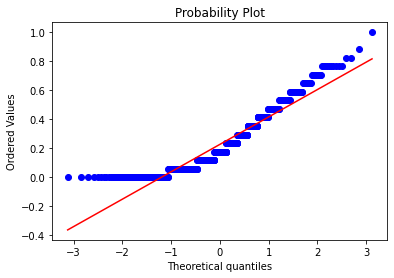

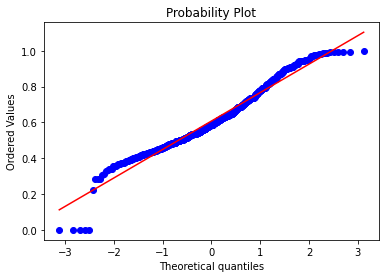

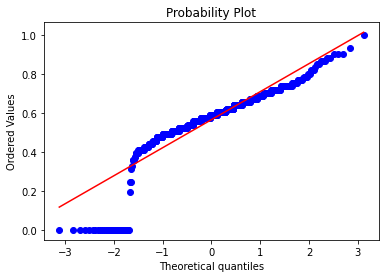

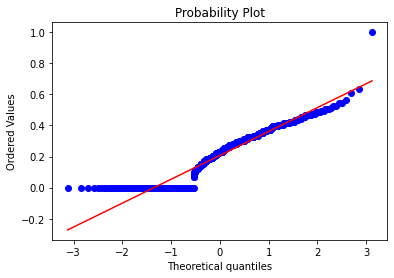

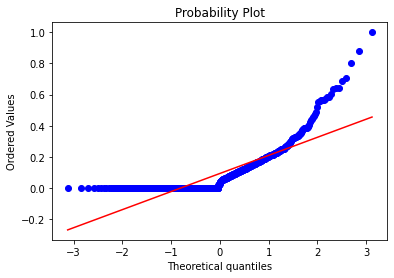

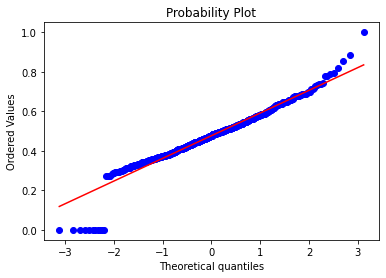

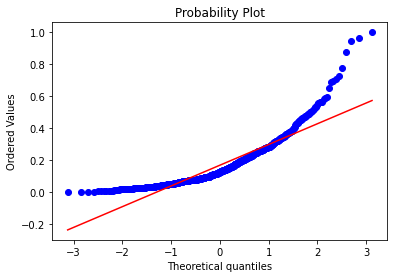

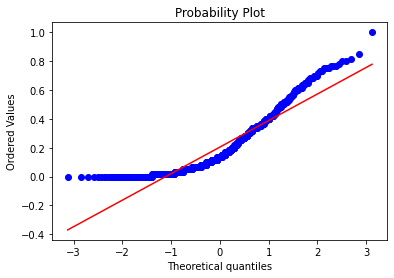

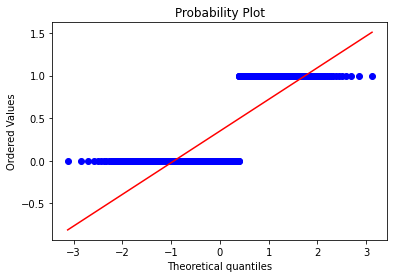

In [13]:
import pandas as pd
import numpy as np


def minmax_norm(df_input):
    return (df - df.min()) / ( df.max() - df.min())

df_minmax_norm = minmax_norm(df)

print(df_minmax_norm)


for column in df_minmax_norm.columns.values:   
    stats.probplot(df_minmax_norm[column],dist="norm",plot=pylab)
    pylab.show()


## Nivell 2

## - Exercici 2

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

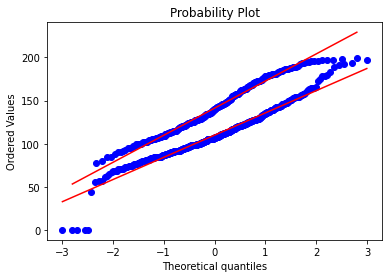

In [18]:
stats.probplot(df[df.Outcome == 1]['Glucose'],dist="norm",plot=pylab)
stats.probplot(df[df.Outcome == 0]['Glucose'],dist="norm",plot=pylab)

pylab.show() 

In [20]:
for column in df.columns.values:   
    stat,p = stats.normaltest(df[df.Outcome ==1][column])
    print('%s stats=%.5f,p=%.5f'%(column,stat,p))
    if p > alpha:
           print('no se rechaza la hipótesis nula H0)\n')
    else:
           print('se rechaza la hipótesis nula H0)')

Pregnancies stats=13.90515,p=0.00096
se rechaza la hipótesis nula H0)
Glucose stats=20.70520,p=0.00003
se rechaza la hipótesis nula H0)
BloodPressure stats=117.57742,p=0.00000
se rechaza la hipótesis nula H0)
SkinThickness stats=1.07045,p=0.58554
no se rechaza la hipótesis nula H0)

Insulin stats=110.48636,p=0.00000
se rechaza la hipótesis nula H0)
BMI stats=35.22502,p=0.00000
se rechaza la hipótesis nula H0)
DiabetesPedigreeFunction stats=105.52136,p=0.00000
se rechaza la hipótesis nula H0)
Age stats=15.48997,p=0.00043
se rechaza la hipótesis nula H0)
Outcome stats=897.86522,p=0.00000
se rechaza la hipótesis nula H0)


Outcome stats=0.99582,p=0.90506
Outcome stats=0.98307,p=0.00031


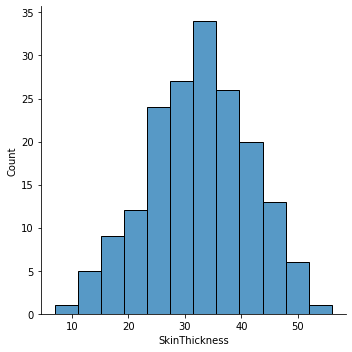

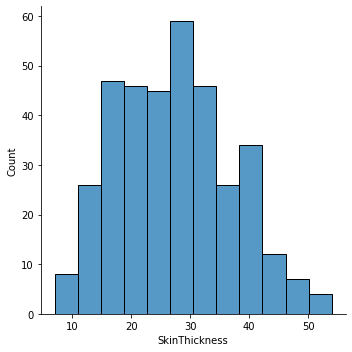

In [33]:
df_clean=df[df.SkinThickness > 0]
df_clean=df_clean[df_clean.SkinThickness < 60]

stat, p = stats.shapiro(df_clean[df_clean.Outcome == 1]['SkinThickness'])
print('%s stats=%.5f,p=%.5f'%(column,stat,p))
stat, p = stats.shapiro(df_clean[df_clean.Outcome == 0]['SkinThickness'])
print('%s stats=%.5f,p=%.5f'%(column,stat,p))

sns.displot(df_clean[df_clean.Outcome == 1]['SkinThickness'])
sns.displot(df_clean[df_clean.Outcome == 0]['SkinThickness'])

## Nivell 3
## - Exercici 3

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.